In [1]:
import numpy as np
import pandas as pd
import scipy as s
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("cleaned_autos.csv")

In [3]:
data.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,Privat,Angebot,480,Test,Limousine,1993,Manuell,0,Golf,150000,3,Benzin,Volkswagen,Nein,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_sportback_2.7_tdi,Privat,Angebot,18300,Test,Coupe,2011,Manuell,190,A4,125000,5,Diesel,Audi,Ja,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_grand_cherokee_""overland""",Privat,Angebot,9800,Test,Suv,2004,Automatik,163,Grand,125000,8,Diesel,Jeep,Nein,2016-03-14,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,Golf_4_1_4__3türer,Privat,Angebot,1500,Test,Kleinwagen,2001,Manuell,75,Golf,150000,6,Benzin,Volkswagen,Nein,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_fabia_1.4_tdi_pd_classic,Privat,Angebot,3600,Test,Kleinwagen,2008,Manuell,69,Fabia,90000,7,Diesel,Skoda,Nein,2016-03-31,0,60437,2016-04-06 10:17:21


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367542 entries, 0 to 367541
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          367542 non-null  object
 1   name                 367542 non-null  object
 2   seller               367542 non-null  object
 3   offerType            367542 non-null  object
 4   price                367542 non-null  int64 
 5   abtest               367542 non-null  object
 6   vehicleType          367542 non-null  object
 7   yearOfRegistration   367542 non-null  int64 
 8   gearbox              367542 non-null  object
 9   powerPS              367542 non-null  int64 
 10  model                367542 non-null  object
 11  kilometer            367542 non-null  int64 
 12  monthOfRegistration  367542 non-null  int64 
 13  fuelType             367542 non-null  object
 14  brand                367542 non-null  object
 15  notRepairedDamage    367542 non-nu

In [5]:
data.isnull().sum()

dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
nrOfPictures           0
postalCode             0
lastSeen               0
dtype: int64

##### 1.Can you tell me no.of vehicles by brand available on ebay for sale with the help of visualization.

In [6]:
vehicle_count=data["brand"].value_counts()

In [7]:
vehicle_count

Volkswagen       79639
Bmw              40274
Opel             40136
Mercedes_benz    35307
Audi             32873
Ford             25573
Renault          17969
Peugeot          11027
Fiat              9676
Seat              7022
Mazda             5695
Skoda             5641
Smart             5249
Citroen           5182
Nissan            5037
Toyota            4694
Hyundai           3646
Mini              3394
Volvo             3327
Mitsubishi        3061
Honda             2836
Kia               2555
Alfa_romeo        2345
Suzuki            2327
Porsche           2215
Chevrolet         1845
Chrysler          1452
Dacia              900
Jeep               807
Daihatsu           806
Subaru             779
Land_rover         770
Jaguar             621
Trabant            591
Daewoo             542
Saab               530
Rover              490
Lancia             484
Lada               225
Name: brand, dtype: int64

In [8]:
data1=pd.DataFrame(vehicle_count)

In [9]:
data1=data1.reset_index()

In [10]:
data1

,index,brand
0,Volkswagen,79639
1,Bmw,40274
2,Opel,40136
3,Mercedes_benz,35307
4,Audi,32873
5,Ford,25573
6,Renault,17969
7,Peugeot,11027
8,Fiat,9676
9,Seat,7022


In [11]:
data1.rename(columns={"index":"Brand","brand":"brand_count"},inplace=True)

In [12]:
data1

,Brand,brand_count
0,Volkswagen,79639
1,Bmw,40274
2,Opel,40136
3,Mercedes_benz,35307
4,Audi,32873
5,Ford,25573
6,Renault,17969
7,Peugeot,11027
8,Fiat,9676
9,Seat,7022


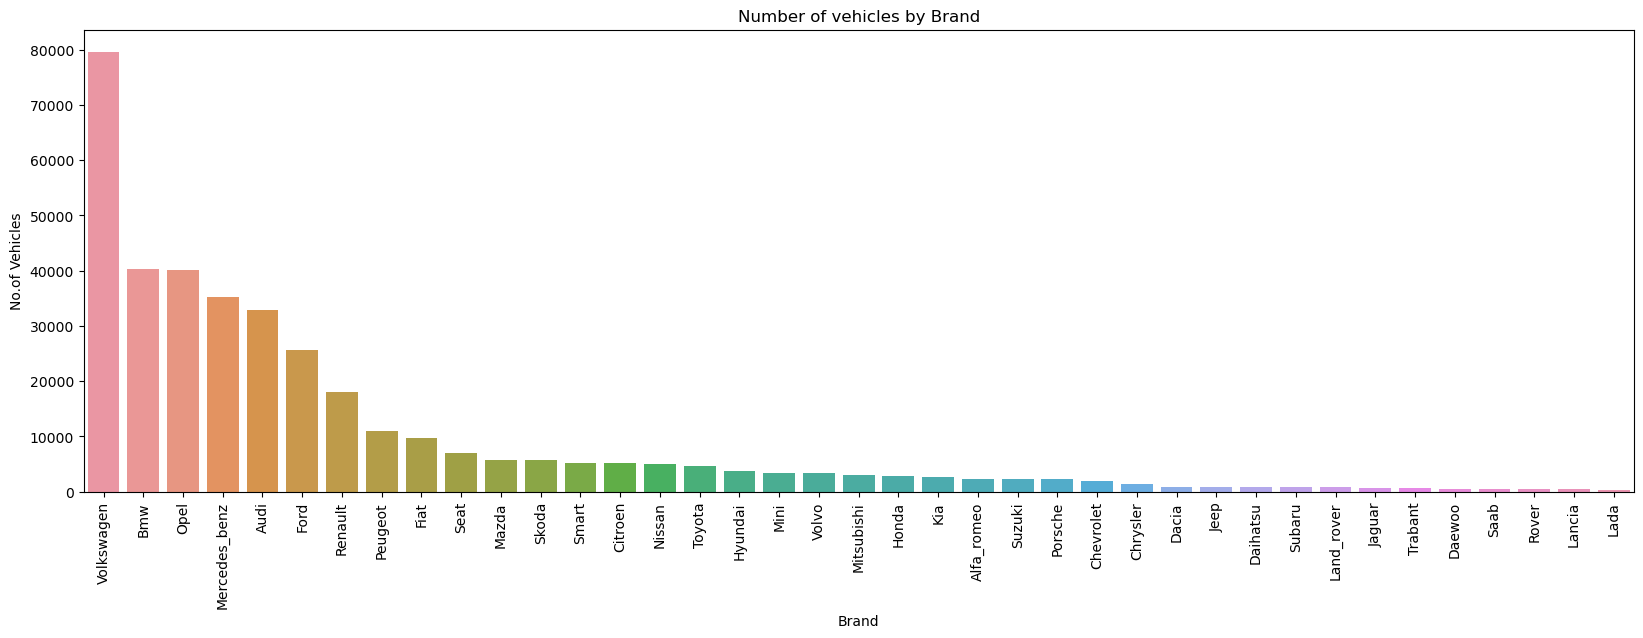

In [13]:
plt.figure(figsize=(20, 6))
sns.barplot(data=data1,x="Brand",y="brand_count")
plt.title("Number of vehicles by Brand")
plt.xlabel("Brand")
plt.ylabel("No.of Vehicles")
plt.xticks(rotation=90)
plt.show()

##### 2.What is the average price for vehicles based on the type of vehicle as well as on the type of gearbox.Explain me with both numerical and visualization analysis.

In [14]:
vehicle=data.groupby("vehicleType")[["price"]].mean()

In [15]:
vehicle=vehicle.reset_index()

In [16]:
vehicle

,vehicleType,price
0,Andere,40483.537217
1,Bus,10302.154602
2,Cabrio,14818.152195
3,Coupe,24073.071794
4,Kleinwagen,4188.791819
5,Kombi,7882.399545
6,Limousine,14210.157136
7,Suv,12995.190972


In [17]:
gearbox=data.groupby("gearbox")[["price"]].mean()

In [18]:
gearbox=gearbox.reset_index()

In [19]:
gearbox

,gearbox,price
0,Automatik,16027.504194
1,Manuell,9403.267766


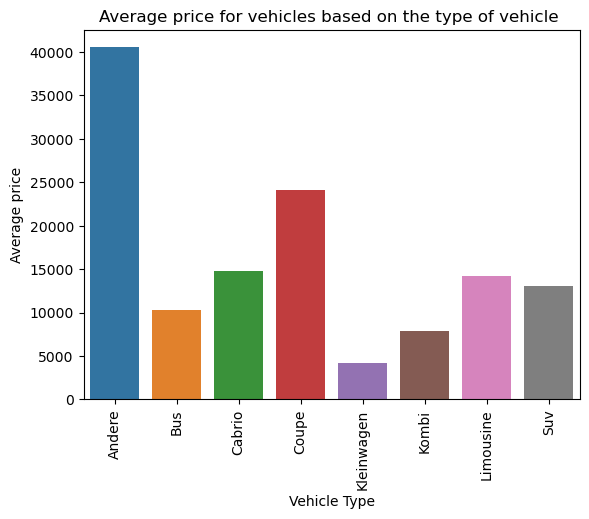

In [20]:
sns.barplot(data=vehicle,x="vehicleType",y="price")
plt.title('Average price for vehicles based on the type of vehicle ')
plt.xlabel('Vehicle Type')
plt.ylabel('Average price')
plt.xticks(rotation=90)
plt.show()

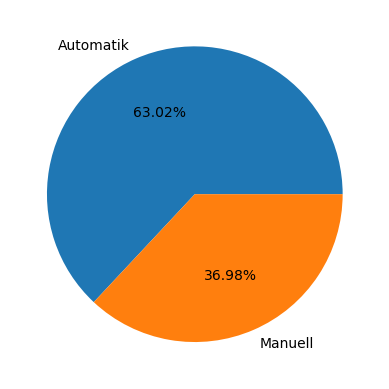

In [21]:
plt.pie(gearbox.price, labels=gearbox.gearbox,autopct='%1.2f%%')
plt.show()

##### 3.What is the marginal probabilty of private seller.

In [22]:
privat_seller=data["seller"].value_counts().get("Privat",0) # count of privat sellers     

In [23]:
Gewerblich_seller=data["seller"].value_counts().get("Gewerblich",0)  # count of  Gewerblich sellers

In [24]:
seller=privat_seller+Gewerblich_seller   # Total count of sellers

In [25]:
seller

367542

In [ ]:
### Marginal Probability=count of private seller/Total count of sellers

In [26]:
marginal_probability=privat_seller/seller

In [27]:
marginal_probability

0.9999918376675319